<a href="https://colab.research.google.com/github/saiPraneeth1608/saipraneeth_INFO5731_Spring2020/blob/main/In_Class_exercises-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
df.head(100)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
95,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,very well,0.0
96,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,1,Cannot connect to GSM network,0.0
97,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"This cell phone exceeded my expectations, it's...",1.0
98,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"pros.. it works fine, its easy to use, not too...",1.0


In [ ]:
# Text Preprocessing
df['Text'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['Text'] = df['Text'].str.replace('[^\w\s]','')
from textblob import Word
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df['Text'].head(10)

0    feel lucky found used phone u used hard phone ...
1    nice phone nice grade pantach revue clean set ...
2                                              pleased
3          work good go slow sometimes good phone love
4    great phone replace lost phone thing volume bu...
5    already phone problem know stated used dang st...
6    charging port loose got soldered needed new ba...
7    phone look good wouldnt stay charged buy new b...
8    originally using samsung s2 galaxy sprint want...
9    battery life great responsive touch issue some...
Name: Text, dtype: object

In [ ]:
# TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_vects = tfidf_vect.fit_transform(df['Text'].values)

In [ ]:
names= tfidf_vect.get_feature_names()

In [ ]:
# K Means
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 9,init='k-means++', n_jobs = -1,max_iter=10000, random_state=50)
model.fit(tfidf_vects)
from collections import Counter
Counter(model.labels_)

Counter({0: 2767,
         1: 2019,
         2: 1103,
         3: 15326,
         4: 1694,
         5: 1011,
         6: 1480,
         7: 24875,
         8: 1174})

In [ ]:
labels = model.labels_
cluster_center=model.cluster_centers_
cluster_center

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.35224547e-05, 0.00000000e+00, 0.00000000e+00, ...,
        1.46554210e-05, 1.53326565e-05, 1.46554210e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(tfidf_vects, model.labels_, metric='euclidean')
silhouette_score

0.04406377668575892

In [ ]:
#DBSCAN
Text_reviews=[]
for i in df['Text']:
  Text_reviews.append(i.split())
import gensim
w2v_model=gensim.models.Word2Vec(Text_reviews, size=100, workers=4)

In [ ]:
import numpy as np
vectors = []
for i in Text_reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)  
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [ ]:
from sklearn.cluster import DBSCAN
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

In [ ]:
def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] 

In [ ]:
vectors.shape

(51449, 100)

In [ ]:
neighbor = []
for val in vectors[:300]:
    neighbor.append(compute200thnearestneighbour(val, vectors[:300]))
neighbor.sort()

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

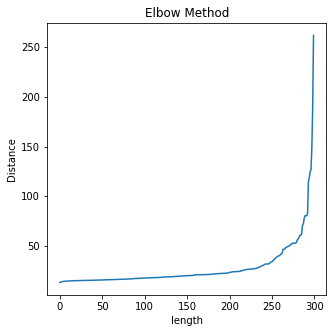

In [ ]:
# Plotting for the Elbow Method :
plt.figure(figsize=(5,5))
plt.title("Elbow Method")
plt.plot([x for x in range(len(neighbor))], neighbor)
plt.xlabel("length")
plt.ylabel("Distance")
plt.show()

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

In [ ]:
#You can write you answer here.